In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("../code/")
import d2lzh_pytorch as d2l

In [14]:
n_train,n_test,true_w,true_b=100,100,[1.2,-3.4,5.6],5
features =torch.randn((n_train+n_test,1))
poly_features=torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1) 
labels=(true_w[0]*poly_features[:,0]+true_w[1]*poly_features[:,1]+true_w[2]*poly_features[:,2]+true_b)
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [26]:
features[:2],poly_features[:2],labels[:2]

(tensor([[-0.1490],
         [-0.4188]]), tensor([[-0.1490,  0.0222, -0.0033],
         [-0.4188,  0.1754, -0.0734]]), tensor([4.7187, 3.4998]))

In [47]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [58]:
num_epochs,loss=100,torch.nn.MSELoss()

def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net=torch.nn.Linear(train_features.shape[-1],1)
    
    batch_size=min(10,train_labels.shape[0])
    dataset=torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
    optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels=train_labels.view(-1,1)
        test_labels=test_labels.view(-1,1)
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
    print('final epoch:train loss',train_ls[-1],'test loss',test_ls[-1])
    semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',range(1,num_epochs+1),test_ls,['train','test'])
    print('weight:',net.weight.data,'\nbias:',net.bias.data)

final epoch:train loss 9.048560605151579e-05 test loss 0.00013089066487737
weight: tensor([[ 1.2001, -3.3992,  5.5997]]) 
bias: tensor([4.9999])


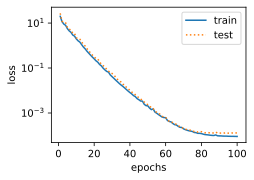

In [59]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[n_train:])

final epoch:train loss 178.4807586669922 test loss 142.54141235351562
weight: tensor([[16.5266]]) 
bias: tensor([1.1224])


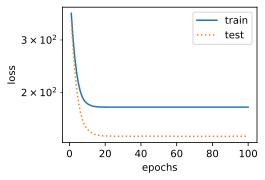

In [60]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],labels[n_train:])

final epoch:train loss 0.7811592221260071 test loss 519.9014892578125
weight: tensor([[-0.4101,  0.6496, -0.3258]]) 
bias: tensor([3.4120])


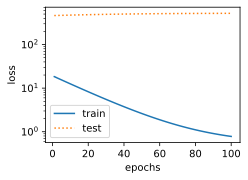

In [61]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],labels[n_train:])